<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Ice-age dynamics: 3. Dating
## U/Th disequilibrium
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we plot the evolution pathways for **Uranium** and **Thorium** after disturbing
the equilibrium. 

We first initialize the `python` libraries.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from ipywidgets import interactive
import ipywidgets as widgets

----
## U/Th series

Note: In the case of radioactive decay, our $c_i$ [-] in the differential equation is **particle number** $P_i$,
which is related to **activity** ($c_i$) [1/s] via the decay constant $\lambda_i$ [1/s]:
$$
(c_i) = \lambda_i c_i
$$

A decay series from parent isotope $P_1$ via other
radioactive isotopes $P_i$ to daughter
isotope $D$ can be described as
$$
P_1 {\stackrel{\lambda_1} \longrightarrow} 
 P_2 {\stackrel{\lambda_2} \longrightarrow}
 P_3 {\stackrel{\lambda_3} \longrightarrow} \dots {\stackrel{\lambda_n} \longrightarrow}
 D
$$

We use this setup for modelling the U-Th disequilibrium method:

$$
 \fbox{${}^{238}\mbox{U}$} {\stackrel{\lambda_{238}} \longrightarrow}
 {}^{234}\mbox{Th} {\stackrel{ } \longrightarrow}
 {}^{234}\mbox{Pa} {\stackrel{ } \longrightarrow}
 \fbox{${}^{234}\mbox{U}$} {\stackrel{ \lambda_{234}} \longrightarrow}
 \fbox{${}^{230}\mbox{Th}$} {\stackrel{ \lambda_{230}} \longrightarrow}
 {}^{226}\mbox{Ra} {\stackrel{ } \longrightarrow} \dots
                   {\stackrel{ } \longrightarrow} {}^{206}\mbox{Pb}
$$

The half-lifes of the three relevant isotopes, ${}^{238}$U, ${}^{234}$U, and ${}^{230}$Th, are:
$$
\begin{array}{rcl}
t^{238}_{1/2} &=& 4.469\mbox{ Ga} \\
t^{234}_{1/2} &=& 248084\mbox{ a} \\
t^{230}_{1/2} &=& 75203\mbox{ a}
\end{array}
$$

Re-writing as differential equations:
$$
\begin{array}{rcl}
\frac{\partial P_1}{\partial t}
&=&
 - \lambda_1 P_1 \\
\frac{\partial P_2}{\partial t}
&=&
 + \lambda_1 P_1 - \lambda_2 P_2 \\
\frac{\partial P_3}{\partial t}
&=&
 + \lambda_2 P_2 - \lambda_3 P_3
\end{array}
$$

----
### Secular equilibrium

Thus, ${}^{238}$U decays much slower than all the other isotopes, and usually the decay series
in in **secular equilibrium**, which is expressed as:
$$
\lambda_1 P_1 = \lambda_2 P_2 = \dots =\lambda_n P_n = \mbox{const}
$$
As the individual product (decay rate time particle number) are the activity, the
activities for all isotopes are equal, when they are in secular equilibrium.

In limestone, all isotopes are in **secular equilibrium** because of the long half-life of ${}^{238}$U.

----
### U/Th disequilibrium

During dissolution and precipitation processes of limestone, the **secular equilibrium**
is disturbed:

- Secular equilibrium **disturbed** during **dissolution** of limestone.
- **Uranian isotopes** ${}^{238}\mbox{U}$ and ${}^{234}\mbox{U}$ **hydrophile**, enriched in solution.
- **Thorium** ${}^{230}\mbox{Th}$ **lithophile**, bound to clay minerals.
- ${}^{234}\mbox{U}$ decay product of ${}^{238}\mbox{U}$. Deformation of crystal lattice through **rebounce**.
- Solution **enriched** with (deformed) ${}^{234}\mbox{U}$  relative to ${}^{238}\mbox{U}$, no ${}^{230}\mbox{Th}$.

$$
\begin{array}{rcl}
 \frac{[{}^{234}\mbox{U}]}{[{}^{238}\mbox{U}]} & > & 1 \\
 [{}^{230}\mbox{Th}]                                 & = & 0
\end{array}
$$

----
## Analytical solution

An analytical solution for the temporal evolution of the **disequilibrium** back
to the **secular equilibrium** can be found as:

$$
\begin{array}{rcl}
\left( \frac{{}^{234}\mbox{U}}{{}^{238}\mbox{U}} \right)(t) &=&
 1 + \left[ \left( \frac{{}^{234}\mbox{U}_0}{{}^{238}\mbox{U}} \right) - 1 \right] e^{-\lambda_{234} t} \\
 \left( \frac{{}^{230}\mbox{Th}}{{}^{234}\mbox{U}} \right)(t) & = &
   \left( \frac{{}^{234}\mbox{U}}{{}^{238}\mbox{U}} \right)^{-1} \left( 1 - e^{-\lambda_{230} t} \right) \\
 &+& \left[ 1 - \left( \frac{{}^{234}\mbox{U}}{{}^{238}\mbox{U}} \right)^{-1} \right]
   \frac{\lambda_{230}}{\lambda_{230}- \lambda_{234}}
 \left( 1- e^{(\lambda_{234}-\lambda_{230}) t} \right)
\end{array}
$$

In [2]:
U234U238_0  = 1.2
Th230U234_0 = 0.
 
lambda238 = 1.551e-10 # a^-1
lambda234 = 2.794e-6  # a^-1
lambda230 = 9.217e-6  # a^-1
print('238U:  ',np.log(2)/lambda238*1e-9,' Ga')
print('234U:  ',np.log(2)/lambda234,' a')
print('230Th: ',np.log(2)/lambda230,' a')

238U:   4.469034046163412  Ga
234U:   248084.1734287564  a
230Th:  75203.12255180051  a


In [3]:
times     = np.linspace(1e3,2e6,501)
U234U238  = np.zeros_like(times)
Th230U234 = np.zeros_like(times)
for i,time in enumerate(times):
    U234U238[i]  = 1. + (U234U238_0-1.)*np.exp(-lambda234*time)
    Th230U234[i] = (1. - np.exp(-lambda230*time)) / U234U238[i] 
    + (1. - 1./U234U238[i]) * lambda230 / (lambda230-lambda234) * (1.-np.exp((lambda234-lambda230)*time))


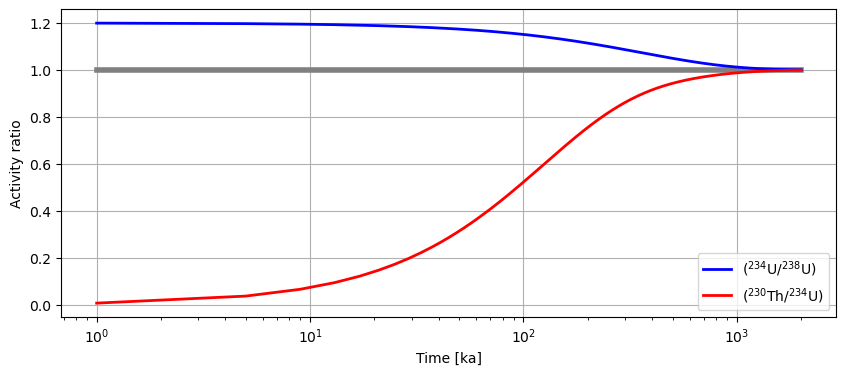

In [4]:
plt.figure(figsize=(10,4))
plt.xlabel('Time [ka]')
plt.ylabel('Activity ratio')
plt.xscale('log')
plt.plot([times.min()/1000,times.max()/1000],[1.,1.],linewidth=4,color='gray')
plt.plot(times/1000,U234U238,linewidth=2,color='blue',label='($^{234}$U/$^{238}$U)')
plt.plot(times/1000,Th230U234,linewidth=2,color='red',label='($^{230}$Th/$^{234}$U)')

plt.grid()
plt.legend()

----
## Numerical solution

In [9]:
# define initial particle number and decay rates
year2sec   = 365.25*24*3600
decayrates = [lambda238,lambda234,lambda230]

t = np.linspace(0,2e6,1001)

In [10]:
# define right-hand side of differential equation
def rhs(y,t,decayrates):
    dydt1 = -decayrates[0]*y[0]
    dydt2 = +decayrates[0]*y[0] - decayrates[1]*y[1]
    dydt3 = +decayrates[1]*y[1] - decayrates[2]*y[2]
    return [dydt1,dydt2,dydt3]

In [11]:
# set initial condition and solve differential equation with odeint
P0 = [1,1*lambda238/lambda234*1.2,0]
P = scipy.integrate.odeint(rhs, P0, t, args=(decayrates,))

We plot the particle numbers first, normalized to the initial particle number of $^{238}$U:

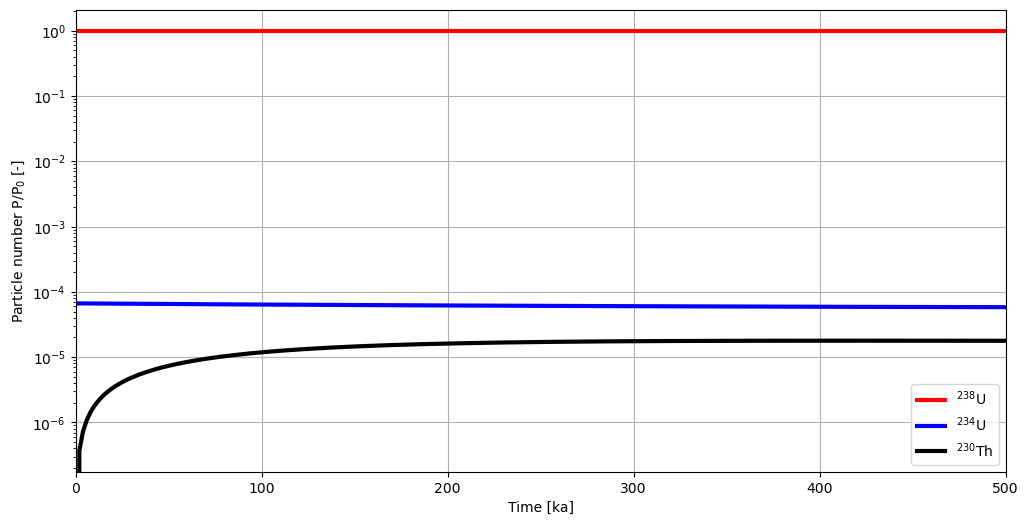

In [12]:
fig,axs = plt.subplots(1,1,figsize=(12,6))
axs.set_xlabel('Time [ka]')
axs.set_ylabel('Particle number P/P$_0$ [-]')
axs.set_xlim([0.0,500])
axs.semilogy(t/1e3,P[:,0],linewidth=3,color='red',label='$^{238}$U')
axs.semilogy(t/1e3,P[:,1],linewidth=3,color='blue',label='$^{234}$U')
axs.semilogy(t/1e3,P[:,2],linewidth=3,color='black',label='$^{230}$Th')
axs.grid()
axs.legend()

We observe, that $^{238}$U remains almost unchanged over the time period plotted,
$^{234}$U decreases slowly, and $^{230}Th increases sharply from zero to a saturation value.

We plot the same data set, this time for **relative activities**
($(^{234}$U)/($^{238}$U) and ($^{230}$Th)/($^{234}$U), and obtain the *classical*
representation of the U-Th disequilibrium.

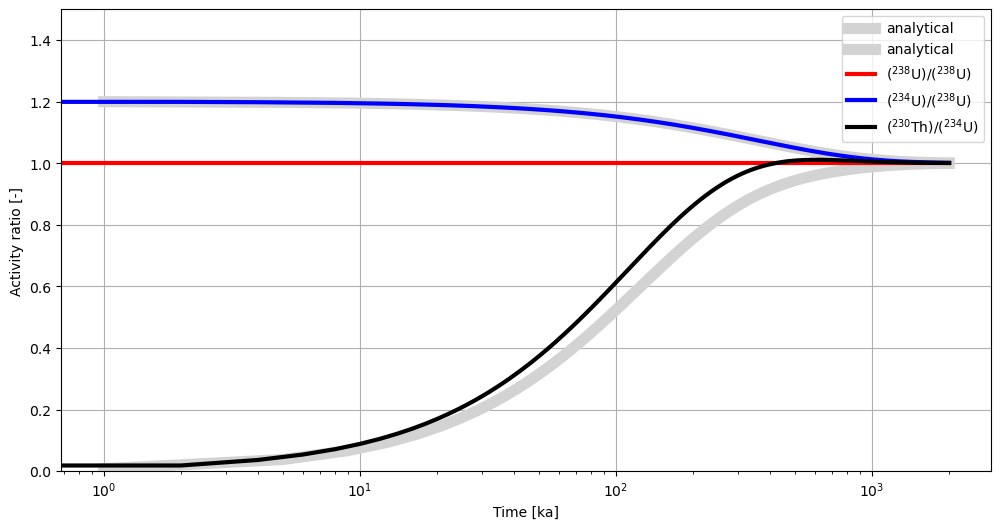

In [15]:
fig,axs = plt.subplots(1,1,figsize=(12,6))
axs.set_xlabel('Time [ka]')
axs.set_ylabel('Activity ratio [-]')
axs.set_ylim([0.0,1.5])
axs.plot(times/1000,U234U238,linewidth=8,color='lightgray',label='analytical')
axs.plot(times/1000,Th230U234,linewidth=8,color='lightgray',label='analytical')

axs.semilogx(t/1e3,P[:,0]*lambda238/(P[:,0]*lambda238),linewidth=3,color='red',label='($^{238}$U)/($^{238}$U)')
axs.semilogx(t/1e3,P[:,1]*lambda234/(P[:,0]*lambda238),linewidth=3,color='blue',label='($^{234}$U)/($^{238}$U)')
axs.semilogx(t/1e3,P[:,2]*lambda230/(P[:,1]*lambda234),linewidth=3,color='black',label='($^{230}$Th)/($^{234}$U)')

axs.grid()
axs.legend()

----